In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import copy
#import adtk
#from adtk.data import validate_series
#from adtk.visualization import plot
#from adtk.detector import ThresholdAD, QuantileAD, InterQuartileRangeAD, PersistAD, LevelShiftAD, VolatilityShiftAD
from IPython.display import display
from ydata_profiling import ProfileReport
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL


In [23]:
data = "../data/uebung/df_activity_1h.txt"

df_activity = pd.read_csv(
    data,
    delimiter=",",
    header=0,
    parse_dates=True,
)


display(df_activity)
print(df_activity.info())

,DateTime,Activity
0,2010-11-04 00:00:00,1
1,2010-11-04 01:00:00,0
2,2010-11-04 02:00:00,1
3,2010-11-04 03:00:00,2
4,2010-11-04 04:00:00,4
...,...,...
5275,2011-06-11 19:00:00,5
5276,2011-06-11 20:00:00,170
5277,2011-06-11 21:00:00,45
5278,2011-06-11 22:00:00,65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5280 entries, 0 to 5279
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  5280 non-null   object
 1   Activity  5280 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 82.6+ KB
None


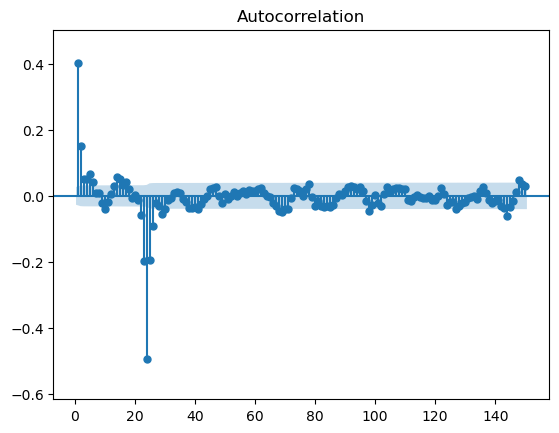

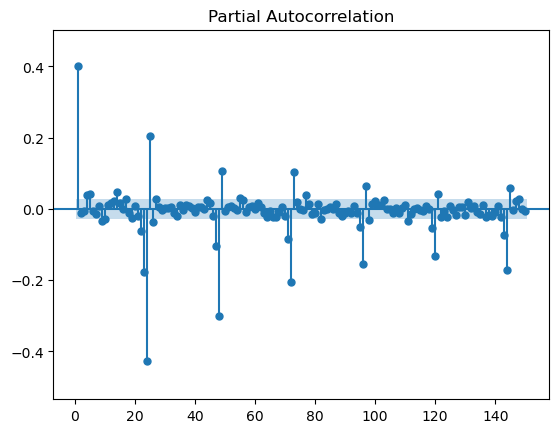

In [26]:
#_ = plot_acf(df_activity["Activity"], lags=240, auto_ylims=True)
#_ = plot_pacf(df_activity["Activity"], lags=78, auto_ylims=True)


#df_activity.plot()

# Seasonal Differencing (z.B. Differenzierung mit einer Periode von 24)
#df_activity = df_activity["Activity"].diff(24)


# Seasonal Differencing with a period of 24
seasonal_diff = df_activity["Activity"].diff(24).dropna()

# Plot ACF and PACF
_ = plot_acf(seasonal_diff, lags=150, auto_ylims=True, zero= False)
_ = plot_pacf(seasonal_diff, lags=150, auto_ylims=True, zero= False)
